In [ ]:
!pip install tensorflow matplotlib seaborn scikit-learn gradio --quiet

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import zipfile
import gradio as gr
from tensorflow.keras.preprocessing import image

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
(train_data, val_data), ds_info = tfds.load(
    'eurosat/rgb',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

class_names = ds_info.features['label'].names



Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/eurosat/rgb/incomplete.8EIMJE_2.0.0/eurosat-train.tfrecord*...:   0%|     …

Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.


In [ ]:
IMG_SIZE = 128
BATCH_SIZE = 32

def preprocess(img, label):
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.cast(img, tf.float32) / 255.0
    return img, tf.one_hot(label, len(class_names))

train_ds = train_data.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_data.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

from tensorflow.keras.layers import Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(len(class_names), activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)

Epoch 1/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.8040 - loss: 0.5763 - val_accuracy: 0.8994 - val_loss: 0.2963
Epoch 2/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.8986 - loss: 0.2970 - val_accuracy: 0.8972 - val_loss: 0.2899
Epoch 3/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9123 - loss: 0.2566 - val_accuracy: 0.8987 - val_loss: 0.2981
Epoch 4/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9206 - loss: 0.2225 - val_accuracy: 0.9117 - val_loss: 0.2676
Epoch 5/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9327 - loss: 0.2016 - val_accuracy: 0.9093 - val_loss: 0.2674
Epoch 6/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9347 - loss: 0.1890 - val_accuracy: 0.9067 - val_loss: 0.2995
Epoch 7/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9450 - loss: 0.1644 - val_accuracy: 0.9098 - val_loss: 0.2818
Epoch 8/10
675/675 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9503 - loss: 0.1476 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━

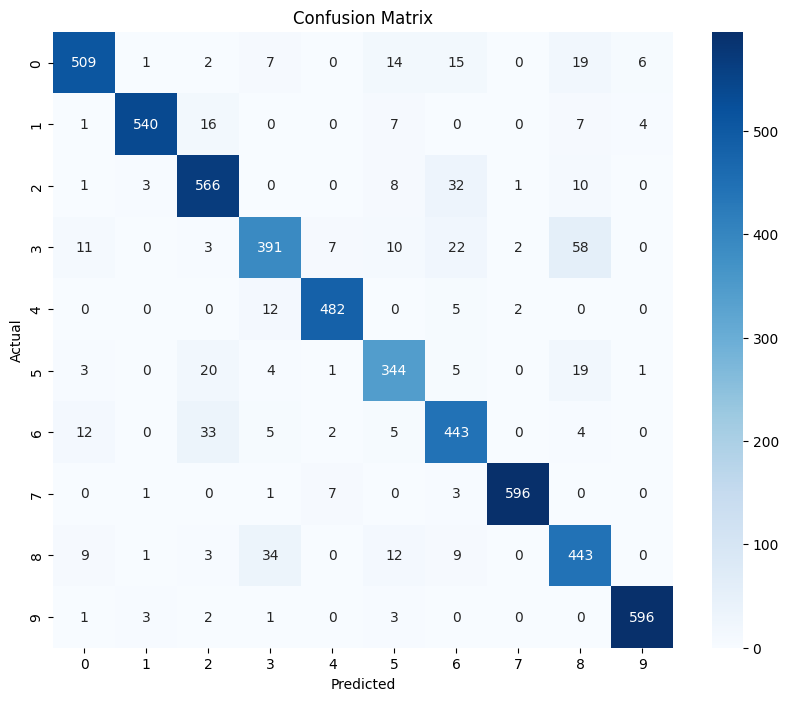

In [ ]:
all_preds = []
all_labels = []

for images, labels in val_ds:
    preds = model.predict(images)
    all_preds.extend(np.argmax(preds, axis=1))
    all_labels.extend(np.argmax(labels.numpy(), axis=1))

print(classification_report(all_labels, all_preds, target_names=class_names))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(all_labels, all_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
model.save("visionearth_model.keras")


In [11]:
def predict_image(img):
    img = tf.image.resize(img, [IMG_SIZE, IMG_SIZE])
    img = tf.cast(img, tf.float32) / 255.0
    img = tf.expand_dims(img, axis=0)

    preds = model.predict(img)
    class_idx = tf.argmax(preds[0]).numpy()
    confidence = tf.reduce_max(preds[0]).numpy()

    return f"🌍 **Predicted**: {class_names[class_idx]}  \n📊 **Confidence**: {confidence:.2f}"


theme = gr.themes.Soft(
    primary_hue="green",
    secondary_hue="gray",
    font=[gr.themes.GoogleFont("Roboto Mono"), "monospace"]
)


with gr.Blocks(theme=theme, title="VisionEarth – Satellite Classifier") as demo:
    gr.Markdown("## 🌍 VisionEarth – Land Use Classifier")
    gr.Markdown("Upload a **satellite image** to classify it into categories like **forest, urban, river, etc.")

    with gr.Row():
        image_input = gr.Image(type="numpy", label="📤 Upload Satellite Image (RGB)")
        output_text = gr.Markdown(label="📈 Prediction Result")

    with gr.Row():
        submit_btn = gr.Button("🚀 Predict")
        clear_btn = gr.ClearButton([image_input, output_text])

    submit_btn.click(fn=predict_image, inputs=image_input, outputs=output_text)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7e00756307ed73da59.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
